In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Uploading the dataset
df = pd.read_csv ("https://raw.githubusercontent.com/vaish0312/HW3/main/faithful.csv")

In [3]:
df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


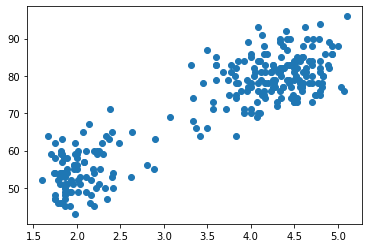

In [4]:
#Drawing the scatter plot
x = df["eruptions"]
y = df["waiting"]
plt.scatter(x,y)
plt.show()

In [ ]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


In [ ]:
df.values

In [ ]:


model = K_Means()
model.fit(df.values)

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=10, linewidths=5)

    

In [17]:
colors = ["red", "blue" , "green", "orange"]

def recalculate_clusters(X,centroids,k):
    clusters=dict()
    for i in range(k):
        clusters[i]=[]
    for data in X:
        e_distance=[]
        for j in range(k):
            e_distance.append(np.linalg.norm(data - centroids[j]))
        clusters[e_distance.index(min(e_distance))].append(data)
    return clusters    
 
def recalculate_centroids(centroids,clusters,k):
    for i in range(k):
        centroids[i]=np.average(clusters[i],axis=0)
    return centroids

def plot_clusters(centroids,clusters,k):
    plt.figure(figsize=(10,8))  
    area = (20)**2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0],cluster[1],c=colors[i % 3])          
        plt.scatter(centroids[i][0],centroids[i][1],s=area,marker='^', edgecolors='white',c=colors[i % 3])


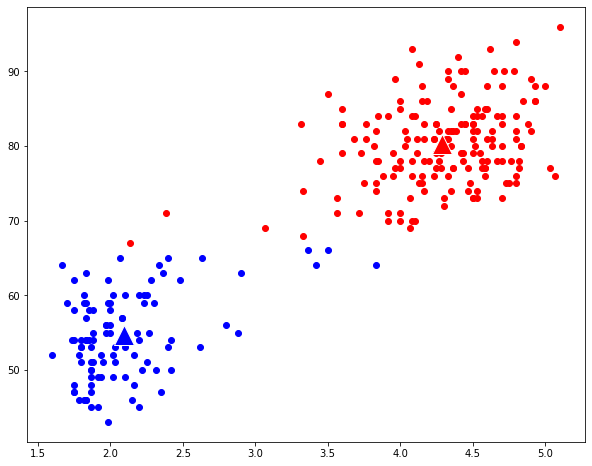

In [19]:

k=2
X = df.values
centroids={}
for i in range(k):
    centroids[i]=X[i]
    
for i in range(1):        
    clusters=recalculate_clusters(X,centroids,k)  
    centroids=recalculate_centroids(centroids,clusters,k)
    plot_clusters(centroids,clusters,k)